In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Vikas\jupyter book\ex_files\student exam score prediction\Expanded_data_with_more_features.csv")

In [3]:
df.head(3)

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
d=df.isnull().sum()*100

In [7]:
d

Unnamed: 0                  0
Gender                      0
EthnicGroup            184000
ParentEduc             184500
LunchType                   0
TestPrep               183000
ParentMaritalStatus    119000
PracticeSport           63100
IsFirstChild            90400
NrSiblings             157200
TransportMeans         313400
WklyStudyHours          95500
MathScore                   0
ReadingScore                0
WritingScore                0
dtype: int64

In [8]:
d/30641

Unnamed: 0              0.000000
Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [9]:
df.isna().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# drop column

In [10]:
df=df.drop("Unnamed: 0",axis=1)

In [11]:
df.sample(15)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
20100,female,group D,high school,standard,completed,married,sometimes,yes,1.0,school_bus,> 10,96,100,100
1013,male,group E,associate's degree,free/reduced,completed,widowed,regularly,yes,1.0,NaN,> 10,78,63,64
25389,female,group D,NaN,standard,completed,divorced,sometimes,no,1.0,school_bus,5 - 10,77,89,94
27859,female,group D,high school,free/reduced,none,married,regularly,yes,3.0,private,5 - 10,51,59,60
10795,female,group D,some college,standard,none,divorced,sometimes,yes,2.0,private,5 - 10,77,81,77
23505,male,group A,some college,free/reduced,none,divorced,regularly,yes,1.0,private,5 - 10,65,74,68
288,male,group E,some college,standard,completed,divorced,regularly,yes,5.0,private,5 - 10,100,88,83
16721,male,group B,bachelor's degree,standard,completed,married,sometimes,no,3.0,school_bus,> 10,85,83,88
16076,female,group C,associate's degree,free/reduced,NaN,NaN,regularly,yes,3.0,school_bus,5 - 10,39,61,55
4239,female,group D,some college,standard,completed,married,regularly,yes,3.0,school_bus,< 5,87,88,97


In [12]:
df.WklyStudyHours.unique()

array(['< 5', '5 - 10', '> 10', nan], dtype=object)

In [13]:
# gender distribution 

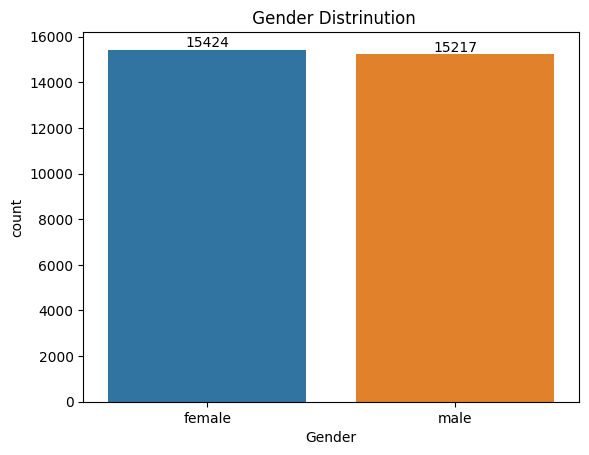

In [14]:
plt.figure.figsize=(10,7)
ax=sns.countplot(data=df,x=df.Gender)
plt.title(" Gender Distrinution")
ax.bar_label(ax.containers[0])
plt.show()

# from the above chat we get inside of gender distribution between student

In [16]:
#

In [17]:
# can parent education help in student eductaion

In [18]:
ps=df.groupby("ParentEduc").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
ps

,MathScore,ReadingScore,WritingScore
ParentEduc,,,
associate's degree,68.365586,71.124324,70.299099
bachelor's degree,70.466627,73.062020,73.331069
high school,64.435731,67.213997,65.421136
master's degree,72.336134,75.832921,76.356896
some college,66.390472,69.179708,68.501432
some high school,62.584013,65.510785,63.632409


<AxesSubplot: ylabel='ParentEduc'>

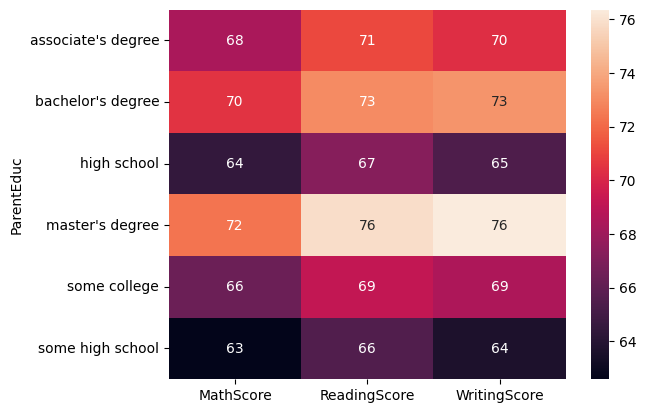

In [19]:
sns.heatmap(ps,annot=True)

# above the looking heat map we can clearly say that parent eduction matter on student eductaion

In [21]:
#are  Parent Marital Status are affect on student marks

In [22]:
ms=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"})
ms

,MathScore,ReadingScore,WritingScore
ParentMaritalStatus,,,
divorced,66.691197,69.655011,68.799146
married,66.657326,69.389575,68.420981
single,66.165704,69.157250,68.174440
widowed,67.368866,69.651438,68.563452


kk

<AxesSubplot: ylabel='ParentMaritalStatus'>

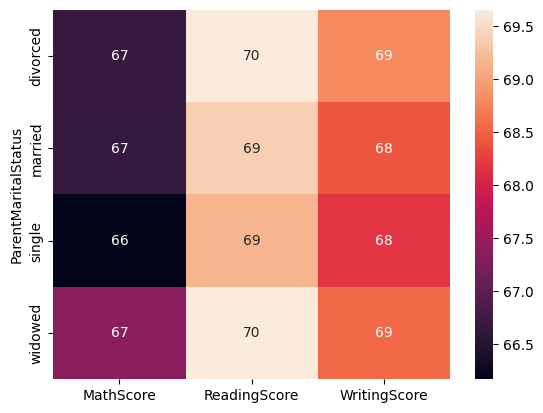

In [23]:
sns.heatmap(ms,annot=True)

# from looking above data we can't say clearly that parent marital stauts that much affect on  education

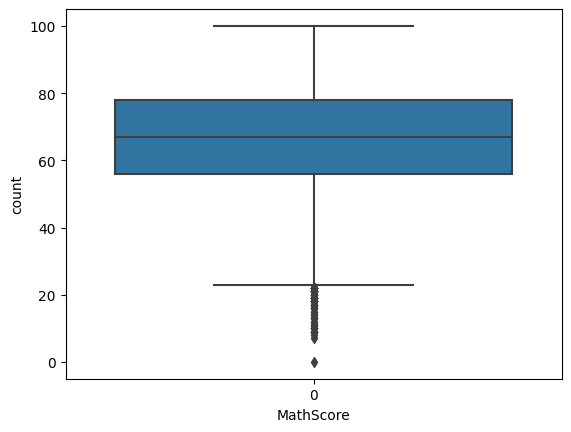

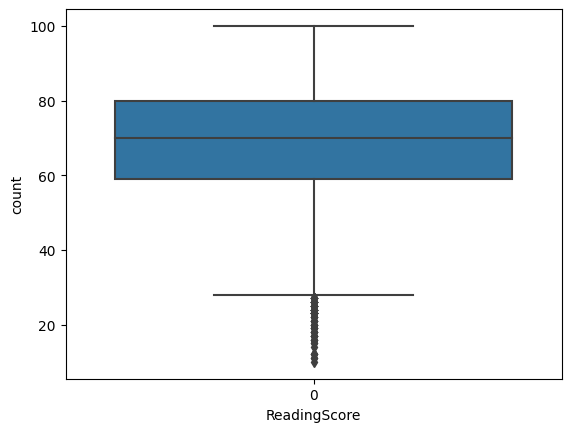

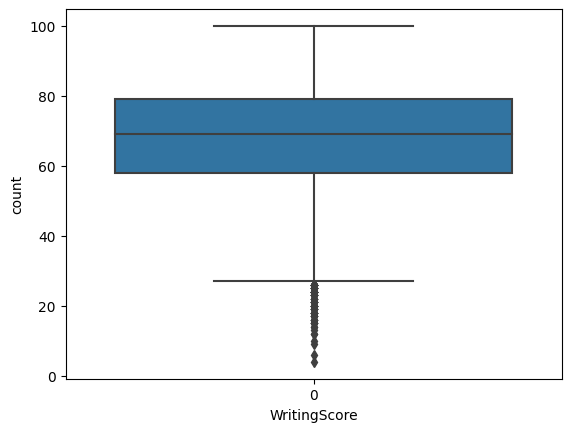

In [25]:
out=["MathScore","ReadingScore","WritingScore"]
for i in out:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel("count")
    plt.show()

In [26]:
df.head(0)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [27]:
df["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

<AxesSubplot: xlabel='EthnicGroup'>

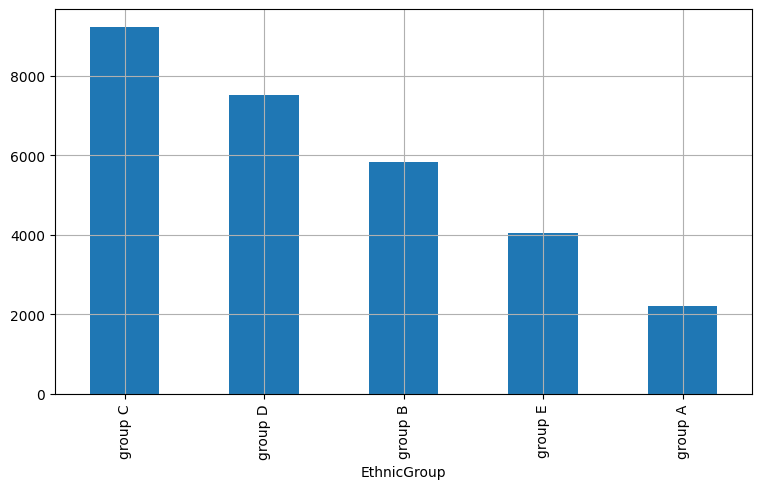

In [28]:
l=["group A","group B","group c"]
df["EthnicGroup"].value_counts().plot(kind="bar",figsize=(9,5),grid=True)

In [29]:
# lets plot  pieplot 

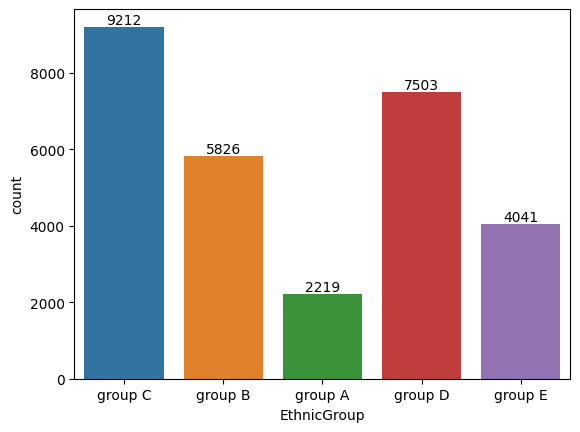

In [44]:
ax1=sns.countplot(data=df , x="EthnicGroup")
ax1.bar_label(ax1.containers[0])
plt.show()

C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Vikas\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning

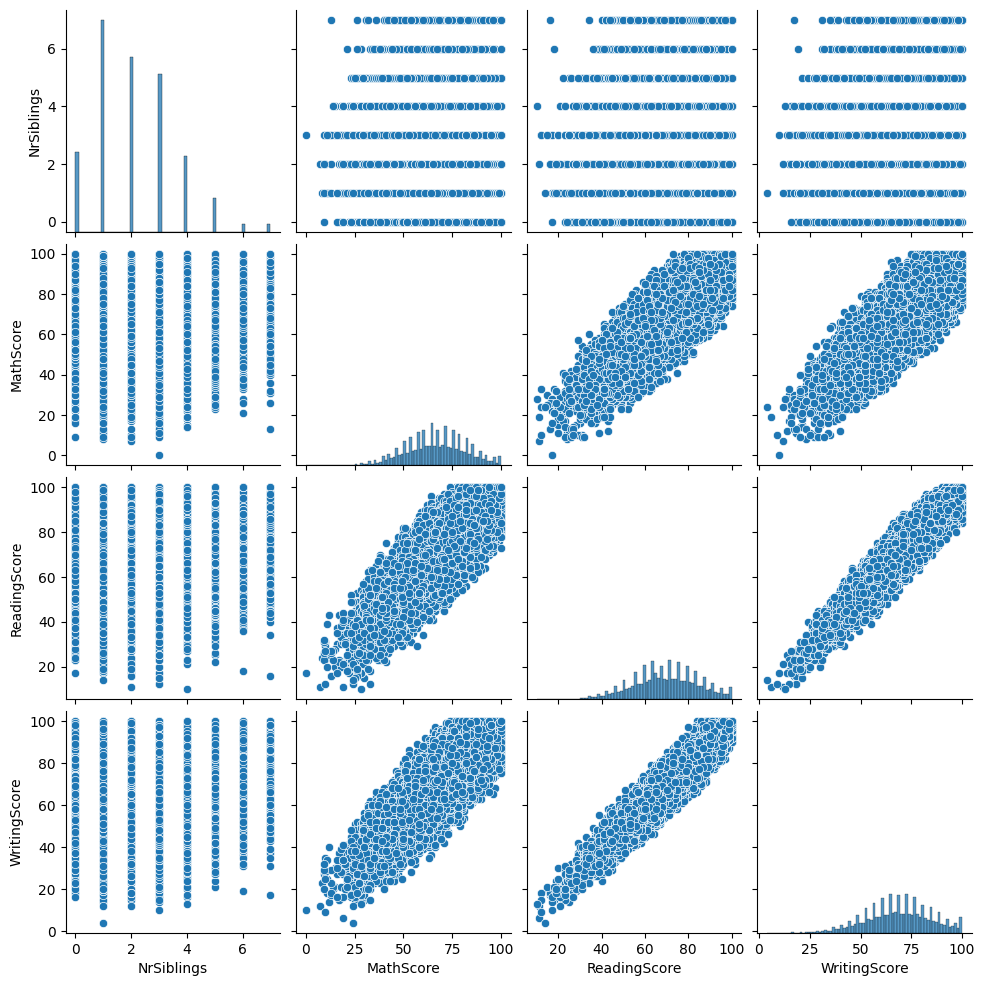

In [46]:
sns.pairplot(df)

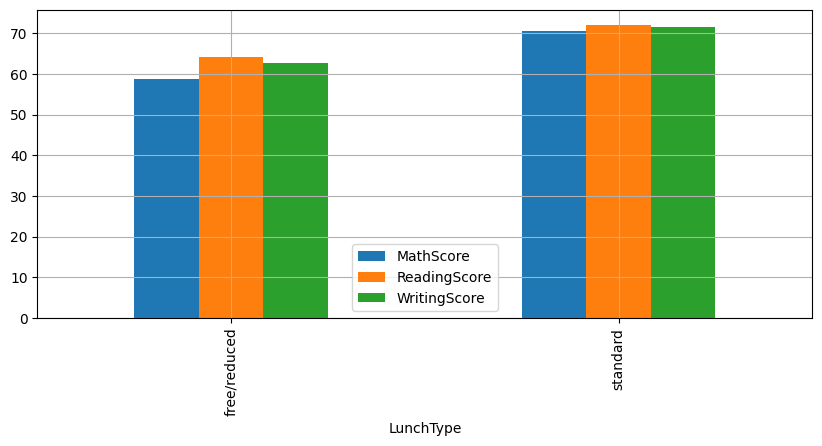

In [54]:
food=df.groupby("LunchType").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).plot(kind="bar",grid=True,figsize=(10,4))


In [50]:
df.LunchType.unique()

array(['standard', 'free/reduced'], dtype=object)

# yes lunch type is matter while studing

In [56]:
df.head(0)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


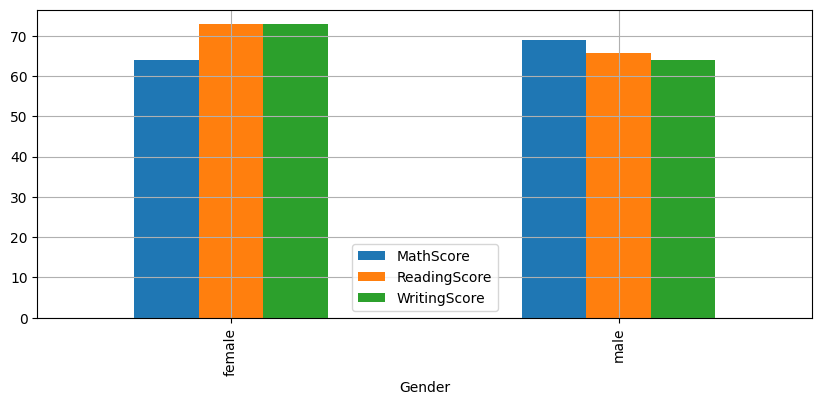

In [61]:
gender=df.groupby("Gender").agg({"MathScore":"mean","ReadingScore":"mean","WritingScore":"mean"}).plot(kind="bar",grid=True,figsize=(10,4))


# male are good in maths while female are good in reading and writing